## 1. Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('D2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
gender              6110 non-null object
age                 6110 non-null object
height              6110 non-null int64
weight              6110 non-null int64
blood_type          6110 non-null object
insurance           6110 non-null object
income              6110 non-null object
race                6110 non-null object
immigrant           6110 non-null object
smoking             6110 non-null object
alcohol             6110 non-null float64
contacts_count      6110 non-null float64
house_count         6110 non-null float64
working             6110 non-null object
worried             6110 non-null int64
covid19_positive    6110 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 763.8+ KB


In [2]:
for i in df:
    print(i)
    print(df[i].unique())
    print()

gender
['male' 'female' 'other']

age
['30_40' '70_80' '50_60' '20_30' '60_70' '40_50' '80_90' '90_100' '10_20'
 '0_10' '100_110']

height
[174 182 184 164 192 180 186 176 172 178 190 158 132 170 152 162 166 168
 154 160 156 150 194 188 198 196 136 146 144 138 148 114 116 238 134 126
 204 228 122 200 118 110 120 128 210 124 112 202 130 216]

weight
[ 64 118  72  92 100  80  84 116  82  68  78 180  96 136  62 114  58  76
 160 104  70 124 106  52  56  66  90  54 102  88  60  86 122 112  50 146
  74 138 128 132  48  98 126 134  94 130  44 164 110 158  46 150 140 148
 152 166 108 144 120 162 168 176 178 174 142 154 156 170]

blood_type
['bp' 'unknown' 'an' 'ap' 'on' 'op' 'abp' 'abn' 'bn']

insurance
['yes' 'no']

income
['med' 'low' 'high' 'gov']

race
['white' 'mixed' 'asian' 'black' 'hispanic' 'other']

immigrant
['native' 'immigrant']

smoking
['never' 'quit0' 'quit5' 'yeslight' 'quit10' 'yesheavy' 'yesmedium' 'vape']

alcohol
[ 3.0132005  0.        14.         5.         2.        11.


In [3]:
# see for missing value
df['blood_type'].value_counts(dropna=False)

unknown    2025
ap         1338
op         1311
on          436
bp          411
an          259
abp         194
bn           95
abn          41
Name: blood_type, dtype: int64

`blood_type` needs to be drop because there's too much missing values  
(over 20% missing data should be dropped)

In [4]:
def data_prep():
    
    df = pd.read_csv('D2.csv')
    
    # change data type
    df['alcohol'] = df['alcohol'].round().astype(int)
    df['contacts_count'] = df['contacts_count'].round().astype(int)
    df['house_count'] = df['house_count'].round().astype(int)
    
    # change 'insurance' & 'immigrant' into binary 0/1 variable
    insurance_map = {'yes': 1, 'no': 0}
    df['insurance'] = df['insurance'].map(insurance_map)
    
    immi_map = {'immigrant': 1, 'native': 0}
    df['immigrant'] = df['immigrant'].map(immi_map)
    
    age_map = {'30_40':4 ,'70_80':8, '50_60':6, '20_30':3, '60_70':7, '40_50':5, 
               '80_90':9,'90_100':10, '10_20':2,'0_10':1, '100_110':11}
    df['age'] = df['age'].map(age_map)
    
    # drop 'blood_type' column
    df.drop(['blood_type'], axis=1, inplace=True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(
        X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test


# setting random state
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

## 2. Build NN with default

In [5]:
from sklearn.neural_network import MLPClassifier

model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print('Train accuracy:', model_1.score(X_train, y_train))
print('Test accuracy:', model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.8522328735094693
Test accuracy: 0.6988543371522095
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1070
           1       0.65      0.61      0.63       763

    accuracy                           0.70      1833
   macro avg       0.69      0.69      0.69      1833
weighted avg       0.70      0.70      0.70      1833

MLPClassifier(random_state=10)


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [6]:
print(model_1.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### a. default setting are used in this model building  
1. Network Architecture: `'hidden_layer_sizes': (100,)` -> The network consists of a single hidden layer with 100 neurons. The input layer contains 14 features (exclude `blood_type`). The architecture can be interpret as:  
14 onput Layer -> 100 neurons -> 1 output Layer(`covid19_positive`)  
2. Iterations: `'max_iter': 200` -> The neural network will go through a maximum of **200** iterations or epochs. Each iteration invloves forward propagating the input data through the network, calculating the loss, and updating the weights based on the optimization algorithms.  
3. Activation function: `'activation': 'relu'` -> **Rectified Linear Unit**. The relu activation function is widely used in neural networks due to its ability to handle non-linear relationships effectively. It introduces non-linearity by returning the input as-is if it is positive, and returning zero otherwise. The relu activation function is known for its simplicity and ability to alleviate the vanishing gradient problem.  
4. `'early_stop': False` -> early stopping is disabled during the training process. `early_stop` is a technique to prevent overfitting and improve generalization. While it is set to `False`, the training will continue for the maximum number of iterations or epochs specified by `max_iter`(which is set to **200**), that is, it will not stop until it had ran for 200 iterations.  

### b. accuracy  

### c. result in best model

In [7]:
# test model 2 with 'max_iter'=700

model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.9413140051437924
Test accuracy: 0.67430441898527
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1070
           1       0.61      0.61      0.61       763

    accuracy                           0.67      1833
   macro avg       0.66      0.66      0.66      1833
weighted avg       0.67      0.67      0.67      1833

MLPClassifier(max_iter=700, random_state=10)


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [8]:
# test model 3 with 'max_iter'=150

model_3 = MLPClassifier(max_iter=150, random_state=rs)
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_3)

Train accuracy: 0.8339957914425999
Test accuracy: 0.6933987997817785
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1070
           1       0.63      0.63      0.63       763

    accuracy                           0.69      1833
   macro avg       0.68      0.68      0.68      1833
weighted avg       0.69      0.69      0.69      1833

MLPClassifier(max_iter=150, random_state=10)


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


The NN with `max_iter=700` perform higher accuracy on training dataset(**96%**). However, the test accuracy is less than the previous model(**68%**), this indicates the overfitting of training data.  
Although, `model_3` with `max_iter=150` performs a less accuracy on training dataset(**87%**), it performs a slightly higher accuracy on testing data(**70%**).
Therefore, `model_1` does not result in the best model, also has a overfitting problem, which its testing data accuracy(**69.45%**) is much less than the training data(**89.31%**).

## 3. Refine with `GridSearchCV`

In [9]:
print(X_train.shape)

(4277, 35)


In [10]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 36, 5)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,)]},
             return_train_score=True)

In [11]:
cv_1.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': 10,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(random_state=10),
 'n_jobs': -1,
 'param_grid': {'hidden_layer_sizes': [(5,),
   (10,),
   (15,),
   (20,),
   (25,),
   (30,),
   (35,)]},
 'pre_dispatch': '2*n_jobs',
 'refit': True

In [12]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([4.00631969, 4.30783961, 4.84151521, 4.93114433, 5.55594318,
       5.3043838 , 5.3810092 ]), 'std_fit_time': array([0.37554652, 0.50089976, 0.57265757, 0.45223386, 0.89054803,
       0.39460219, 0.55539112]), 'mean_score_time': array([0.00205531, 0.00140302, 0.00365174, 0.00230277, 0.00249996,
       0.00155265, 0.00236065]), 'std_score_time': array([0.00057258, 0.00049038, 0.00664145, 0.00161488, 0.00120447,
       0.0006508 , 0.00268609]), 'param_hidden_layer_sizes': masked_array(data=[(5,), (10,), (15,), (20,), (25,), (30,), (35,)],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (5,)}, {'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (15,)}, {'hidden_layer_sizes': (20,)}, {'hidden_layer_sizes': (25,)}, {'hidden_layer_sizes': (30,)}, {'hidden_layer_sizes': (35,)}], 'split0_test_score': array([0.67757009, 0.70093458, 0.70093458, 0.72663551, 0.68691589

In [13]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 36, 5))
plt.ylabel('score')
plt.show()

Total number of models:  7


<Figure size 640x480 with 1 Axes>

Total number of models:  7


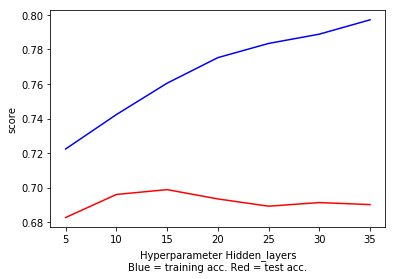

In [14]:
### Enter your code
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 36, 5))
plt.ylabel('score')
plt.show()

### b. accuracy

In [15]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7577741407528642
Test accuracy: 0.7097654118930715
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1070
           1       0.66      0.63      0.64       763

    accuracy                           0.71      1833
   macro avg       0.70      0.70      0.70      1833
weighted avg       0.71      0.71      0.71      1833

{'hidden_layer_sizes': (15,)}


### c. result in best model

In [16]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.740004676174889
Test accuracy: 0.7244953627932351
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1070
           1       0.68      0.63      0.66       763

    accuracy                           0.72      1833
   macro avg       0.72      0.71      0.71      1833
weighted avg       0.72      0.72      0.72      1833

{'hidden_layer_sizes': (9,)}


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [17]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.7416413373860182
Test accuracy: 0.7255864702673214
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1070
           1       0.68      0.64      0.66       763

    accuracy                           0.73      1833
   macro avg       0.72      0.71      0.71      1833
weighted avg       0.72      0.73      0.72      1833

{'alpha': 0.01, 'hidden_layer_sizes': (9,)}


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


It shows that the smaller `hidden_layer_size` is(`9`), and with `alpha = 0.01`(default setting is `0.0001`) will result in a slightly better model than `cv_1`.  
- Train accuracy: **74.16%**
- Test accuracy: **72.56%**  
  
`cv_3` with smaller `'hidden_layer_size'=9` & `'alpha'=0.01` is considered to be a better model, therefore, the training processs did not converge and did not result in the best model.

### d. overfitting

There is no significant sign of **overfitting**. Although the test accuracy is not as high as the model using default settings(test accuracy: **75.78%**), `cv_3` with `GridSearchCV` test accuracy(**72.56%**) is much closer to the train accuracy(**74.56%**), showing no evidence of overfitting.

## 4. Selection with decision tree

In [18]:
import pickle

with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


In [19]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # print(importances)
    
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]
    
    # print(indices)

    for i in indices:
        print(feature_names[i], ':', importances[i])
        
analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.3190086808955489
worried : 0.14489318843032256
weight : 0.07403931293755875
age : 0.07141532375467496
contacts_count : 0.0701721943066074
height : 0.06365856898085374
income_med : 0.05285158373270131
insurance : 0.04962797337956081
race_white : 0.03916274478461132
working_stopped : 0.026257804281694396
alcohol : 0.013346374482412344
house_count : 0.01250734715415805
working_home : 0.010649728585312861
gender_male : 0.0067795748746737345
working_never : 0.0060478784415858005
race_other : 0.0054792149227313475
smoking_vape : 0.005292993252627642
race_mixed : 0.005002189747321963
working_travel critical : 0.00488793321438116
immigrant : 0.004866216157885805


In [20]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4277, 9)


In [21]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 
          'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(
    param_grid=params, 
    estimator=MLPClassifier(random_state=rs), 
    cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.71779284545242
Test accuracy: 0.7163120567375887
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1070
           1       0.67      0.63      0.65       763

    accuracy                           0.72      1833
   macro avg       0.71      0.70      0.71      1833
weighted avg       0.71      0.72      0.72      1833

{'alpha': 0.01, 'hidden_layer_sizes': (9,)}


C:\Users\tamag\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [22]:
cv_sel_model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': 10,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(random_state=10),
 'n_jobs': -1,
 'param_grid': {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
  'alpha': [0.01, 0.001, 0.0001, 1e-05]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,

In [23]:
cv_sel_model.best_estimator_

MLPClassifier(alpha=0.01, hidden_layer_sizes=(9,), random_state=10)

In [24]:
cv_sel_model_best = cv_sel_model.best_estimator_
cv_sel_model_best.n_iter_

200

## 5. ROC curve

A total of seven models has been built:
1. Default neural network (`model_1`)
2. Neural network with relu (`model_2` -> `max_iter=700`)
3. Neural network with relu (`model_3` -> `max_iter=150`)
4. Neural network + grid search (`cv_1`)
5. Neural network + grid search (`cv_2` -> `'hidden_layer_sizes': (9,)`)
6. Neural network + grid search (`cv_3` -> `'alpla': 0.01` & `'hidden_layer_sizes': (9,)`)
7. Neural network + feature selection using DT + grid search (`cv_sel_model`)
    
use ROC curve to compare these models to identify the best performing neural network model considering both true and false positives.

In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_nn_3 = model_3.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_nn_3 = roc_auc_score(y_test, y_pred_proba_nn_3[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu 1:", roc_index_nn_2)
print("ROC index on test for NN with relu 2:", roc_index_nn_3)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_nn_3, tpr_nn_3, thresholds_nn_3 = roc_curve(y_test, y_pred_proba_nn_3[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.7401403706471013
ROC index on test for NN with relu 1: 0.702618782229517
ROC index on test for NN with relu 2: 0.7482465917859898
ROC index on test for NN with gridsearch 1: 0.761058781739567
ROC index on test for NN with gridsearch 2: 0.7721230754155387
ROC index on test for NN with gridsearch 3: 0.7731764677061771
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.7650475863842923


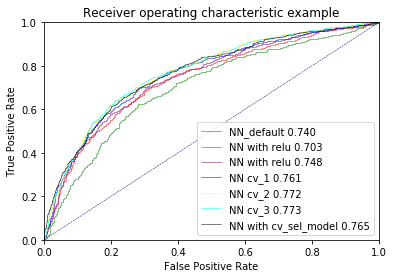

In [26]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_nn_3, tpr_nn_3, label='NN with relu {:.3f}'.format(roc_index_nn_3), color='purple', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Based on the ROC curve, the neural network model(Neural network + grid search (`cv_3` -> `'alpla': 0.01` & `'hidden_layer_sizes': (9,)`)), with the ROC index of 0.773, performs marginally better than other models.